In [2]:
import numpy as pd
from keras.datasets import cifar10
from keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Flatten, Dropout
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#load cifar-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
#normalize the pixel value between 0 and 1
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [6]:
#one-hot encode the labels (CIFAR-10 has 10 classes)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
#Load VGG16 model pre-trained on ImageNet, without the top layers(fully connected layers)
#base_model=VGG16(weights='ImageNet', include_top=False, input_shape=32,32,3)
base_model=VGG16(weights='imagenet', include_top=False)

In [8]:
#freeze the layers of VGG16
for layer in base_model.layers:
    layer.trainable = False

In [9]:
#Buid the model
model= Sequential()

#define input shape fro the sequential model
model.add(InputLayer(input_shape=(32, 32, 3)))# added this line

#add the VGG16 base model
model.add(base_model)

#Flatten the output from VGG16's convolutional layers
model.add(Flatten())

#Add a fully connected layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))

# add dropout for regularization
model.add(Dropout(0.5))

#add output layer with 10 units(for 10 classes) and softmax activation
model.add(Dense(10, activation='softmax'))

#compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

#print the model summary
model.summary()

c:\Users\KH.EN.P2MCA24015\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
#Data augmentation to reduce overfitting
datagen=ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True

)

In [15]:
#Fit the model using data augmentation
batch_size =64
epochs=50
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)


In [ ]:
#Train the model
history=model.fit(train_generator,
                  steps_per_epoch=x_train.shape[0]//batch_size,
                  epochs=epochs,
                  validation_data=(x_test, y_test))

Epoch 1/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 587s 752ms/step - accuracy: 0.1022 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 109s 138ms/step - accuracy: 0.0625 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/50
739/781 ━━━━━━━━━━━━━━━━━━━━ 26s 639ms/step - accuracy: 0.0983 - loss: 2.3027

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

313/313 - 49s - 155ms/step - accuracy: 0.1000 - loss: 2.3027
Test accuracy: 0.1000


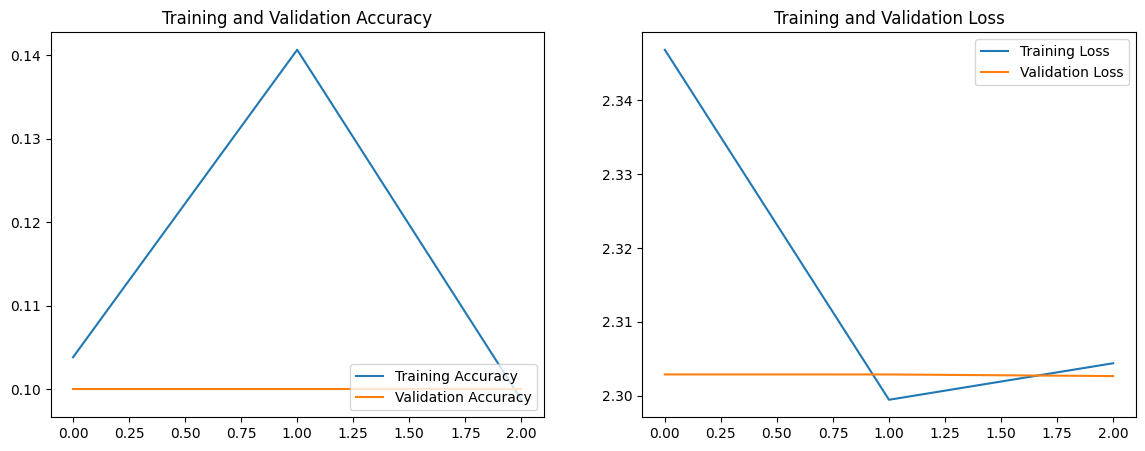

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()